In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline
import matplotlib.pyplot as plt

## Data exploration

In [1]:
dataset = pd.read_csv('../ressources/Traffic_dataset_small.csv')

NameError: name 'pd' is not defined

In [4]:
dataset.head()

,Plaza ID,Date,Hour,Direction,# Vehicles - ETC (E-ZPass),# Vehicles - Cash/VToll
0,1,01/01/2013,0,I,572,262
1,1,01/01/2013,1,I,870,441
2,1,01/01/2013,2,I,785,417
3,1,01/01/2013,3,I,615,464
4,1,01/01/2013,4,I,536,469


In [5]:
dataset.shape

(332880, 6)

In [6]:
dataset['Date'].unique()

array(['01/01/2013', '01/02/2013', '01/03/2013', '01/04/2013',
       '01/05/2013', '01/06/2013', '01/07/2013', '01/08/2013',
       '01/09/2013', '01/10/2013', '01/11/2013', '01/12/2013',
       '01/13/2013', '01/14/2013', '01/15/2013', '01/16/2013',
       '01/17/2013', '01/18/2013', '01/19/2013', '01/20/2013',
       '01/21/2013', '01/22/2013', '01/23/2013', '01/24/2013',
       '01/25/2013', '01/26/2013', '01/27/2013', '01/28/2013',
       '01/29/2013', '01/30/2013', '01/31/2013', '02/01/2013',
       '02/02/2013', '02/03/2013', '02/04/2013', '02/05/2013',
       '02/06/2013', '02/07/2013', '02/08/2013', '02/09/2013',
       '02/10/2013', '02/11/2013', '02/12/2013', '02/13/2013',
       '02/14/2013', '02/15/2013', '02/16/2013', '02/17/2013',
       '02/18/2013', '02/19/2013', '02/20/2013', '02/21/2013',
       '02/22/2013', '02/23/2013', '02/24/2013', '02/25/2013',
       '02/26/2013', '02/27/2013', '02/28/2013', '03/01/2013',
       '03/02/2013', '03/03/2013', '03/04/2013', '03/05

In [7]:
dataset['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [8]:
dataset[['Plaza ID', 'Direction']].drop_duplicates(ignore_index = True)

,Plaza ID,Direction
0,1,I
1,1,O
2,2,I
3,2,O
4,3,I
5,3,O
6,4,I
7,4,O
8,5,I
9,5,O


In [9]:
dataset[['Plaza ID', 'Direction']].value_counts()

Plaza ID  Direction
11        I            17520
5         I            17520
1         O            17520
2         I            17520
          O            17520
3         I            17520
          O            17520
4         I            17520
          O            17520
5         O            17520
9         O            17520
6         I            17520
          O            17520
7         I            17520
          O            17520
8         I            17520
          O            17520
9         I            17520
1         I            17520
dtype: int64

In [10]:
dataset['Hour'].value_counts()

23    13870
22    13870
1     13870
2     13870
3     13870
4     13870
5     13870
6     13870
7     13870
8     13870
9     13870
10    13870
11    13870
12    13870
13    13870
14    13870
15    13870
16    13870
17    13870
18    13870
19    13870
20    13870
21    13870
0     13870
Name: Hour, dtype: int64

In [11]:
dataset.dtypes

Plaza ID                       int64
Date                          object
Hour                           int64
Direction                     object
# Vehicles - ETC (E-ZPass)     int64
# Vehicles - Cash/VToll        int64
dtype: object

In [12]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset

,Plaza ID,Date,Hour,Direction,# Vehicles - ETC (E-ZPass),# Vehicles - Cash/VToll
0,1,2013-01-01,0,I,572,262
1,1,2013-01-01,1,I,870,441
2,1,2013-01-01,2,I,785,417
3,1,2013-01-01,3,I,615,464
4,1,2013-01-01,4,I,536,469
...,...,...,...,...,...,...
332875,11,2014-12-31,19,I,4411,1048
332876,11,2014-12-31,20,I,3604,1106
332877,11,2014-12-31,21,I,2548,884
332878,11,2014-12-31,22,I,1902,702


In [13]:
dataset["# Vehicles - Total"]=dataset["# Vehicles - ETC (E-ZPass)"] + dataset["# Vehicles - Cash/VToll"]
dataset

,Plaza ID,Date,Hour,Direction,# Vehicles - ETC (E-ZPass),# Vehicles - Cash/VToll,# Vehicles - Total
0,1,2013-01-01,0,I,572,262,834
1,1,2013-01-01,1,I,870,441,1311
2,1,2013-01-01,2,I,785,417,1202
3,1,2013-01-01,3,I,615,464,1079
4,1,2013-01-01,4,I,536,469,1005
...,...,...,...,...,...,...,...
332875,11,2014-12-31,19,I,4411,1048,5459
332876,11,2014-12-31,20,I,3604,1106,4710
332877,11,2014-12-31,21,I,2548,884,3432
332878,11,2014-12-31,22,I,1902,702,2604


## Data pre-processing

DEFINE TRAINING AND EVALUATION SETS

In [14]:
datasetTRAIN = dataset[dataset['Date'] < datetime.fromisoformat('2014-07-01')].sort_values(by=['Plaza ID',
                                                                                               'Direction',
                                                                                               'Date',
                                                                                               'Hour'])

In [15]:
datasetTRAIN

,Plaza ID,Date,Hour,Direction,# Vehicles - ETC (E-ZPass),# Vehicles - Cash/VToll,# Vehicles - Total
0,1,2013-01-01,0,I,572,262,834
1,1,2013-01-01,1,I,870,441,1311
2,1,2013-01-01,2,I,785,417,1202
3,1,2013-01-01,3,I,615,464,1079
4,1,2013-01-01,4,I,536,469,1005
...,...,...,...,...,...,...,...
328459,11,2014-06-30,19,I,4970,793,5763
328460,11,2014-06-30,20,I,3860,691,4551
328461,11,2014-06-30,21,I,2988,643,3631
328462,11,2014-06-30,22,I,2505,503,3008


In [16]:
datasetEVAL = dataset[dataset['Date'] >= datetime.fromisoformat('2014-07-01')].sort_values(by=['Plaza ID',
                                                                                               'Direction',
                                                                                               'Date',
                                                                                               'Hour'])

In [17]:
datasetEVAL

,Plaza ID,Date,Hour,Direction,# Vehicles - ETC (E-ZPass),# Vehicles - Cash/VToll,# Vehicles - Total
13104,1,2014-07-01,0,I,524,271,795
13105,1,2014-07-01,1,I,261,162,423
13106,1,2014-07-01,2,I,202,120,322
13107,1,2014-07-01,3,I,204,95,299
13108,1,2014-07-01,4,I,416,174,590
...,...,...,...,...,...,...,...
332875,11,2014-12-31,19,I,4411,1048,5459
332876,11,2014-12-31,20,I,3604,1106,4710
332877,11,2014-12-31,21,I,2548,884,3432
332878,11,2014-12-31,22,I,1902,702,2604


BUILD SERIES OF VEHICLE COUNTS

In [18]:
datasetTRAIN = np.array(datasetTRAIN)
datasetEVAL = np.array(datasetEVAL)
segT = np.int(len(datasetTRAIN)/19)
segE = np.int(len(datasetEVAL)/19)
train_ = np.zeros([segT, 19])
eval_ = np.zeros([segE, 19])

for i in range(19):
    train_[:,i] = datasetTRAIN[segT*i:segT*i+segT,-1]

for i in range(19):
    eval_[:,i] = datasetEVAL[segE*i:segE*i+segE,-1]

In [19]:
train_

array([[ 834.,  765.,  709., ...,  761.,  852., 2121.],
       [1311., 1253., 1001., ..., 1457., 1457., 3649.],
       [1202.,  982.,  837., ..., 1007., 1163., 3137.],
       ...,
       [1397., 1357., 1532., ..., 1874., 1991., 3631.],
       [1263., 1397., 1309., ..., 1443., 1800., 3008.],
       [1115., 1052., 1103., ...,  980., 1406., 2579.]])

In [20]:
train_.shape

(13104, 19)

In [21]:
eval_

array([[ 795.,  774.,  539., ...,  598.,  913., 1857.],
       [ 423.,  384.,  283., ...,  359.,  420., 1056.],
       [ 322.,  258.,  148., ...,  322.,  381.,  663.],
       ...,
       [1602., 1808., 1818., ..., 1711., 1942., 3432.],
       [1402., 1543., 1415., ..., 1339., 1462., 2604.],
       [1005.,  967.,  937., ...,  745.,  827., 1703.]])

In [22]:
eval_.shape

(4416, 19)

DEFINE INPUT SEQUENCES AND TARGET VECTORS FOR THE DEEP LEARNING MODEL

In [23]:
window_len = 12

X_train = np.zeros([segT-window_len,window_len,19])
y_train = np.zeros([segT-window_len,19])
X_eval = np.zeros([segE-window_len,window_len,19])
y_eval = np.zeros([segE-window_len,19])

for i in range(segT-window_len):
    X_train[i,:,:] = train_[i:i+window_len,:]
    y_train[i,:] = train_[i+window_len,:]

for i in range(segE-window_len):
    X_eval[i,:,:] = eval_[i:i+window_len,:]
    y_eval[i,:] = eval_[i+window_len,:]

In [24]:
X_train

array([[[ 834.,  765.,  709., ...,  761.,  852., 2121.],
        [1311., 1253., 1001., ..., 1457., 1457., 3649.],
        [1202.,  982.,  837., ..., 1007., 1163., 3137.],
        ...,
        [ 827.,  562.,  672., ..., 1242.,  761., 1872.],
        [ 975.,  771., 1122., ..., 1795., 1218., 2636.],
        [1204., 1027., 1422., ..., 2340., 2047., 3144.]],

       [[1311., 1253., 1001., ..., 1457., 1457., 3649.],
        [1202.,  982.,  837., ..., 1007., 1163., 3137.],
        [1079.,  974.,  649., ...,  698.,  824., 2302.],
        ...,
        [ 975.,  771., 1122., ..., 1795., 1218., 2636.],
        [1204., 1027., 1422., ..., 2340., 2047., 3144.],
        [1357., 1272., 1643., ..., 2550., 2953., 3841.]],

       [[1202.,  982.,  837., ..., 1007., 1163., 3137.],
        [1079.,  974.,  649., ...,  698.,  824., 2302.],
        [1005.,  834.,  535., ...,  541.,  572., 1688.],
        ...,
        [1204., 1027., 1422., ..., 2340., 2047., 3144.],
        [1357., 1272., 1643., ..., 2550., 295

In [25]:
X_train.shape

(13092, 12, 19)

In [26]:
y_train

array([[1357., 1272., 1643., ..., 2550., 2953., 3841.],
       [1599., 1660., 1924., ..., 3403., 3810., 4339.],
       [1587., 1783., 2332., ..., 2986., 4142., 5225.],
       ...,
       [1397., 1357., 1532., ..., 1874., 1991., 3631.],
       [1263., 1397., 1309., ..., 1443., 1800., 3008.],
       [1115., 1052., 1103., ...,  980., 1406., 2579.]])

In [27]:
y_train.shape

(13092, 19)

In [28]:
X_eval.shape

(4404, 12, 19)

In [29]:
y_eval.shape

(4404, 19)

## Define and train the deep learning recurrent model

MODEL DEFINITION

In [31]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(128, return_sequences=True, input_shape=[None, 19]),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(19) #, activation="relu")
])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, None, 128)         18944     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 19)                2451      
Total params: 54,291
Trainable params: 54,291
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss="mean_squared_error", optimizer="SGD")

MODEL TRAINING

In [35]:
m=np.mean(X_train)
sd=np.std(X_train)

In [36]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [37]:
history = model.fit((X_train-m)/sd, (y_train-m)/sd, epochs=100,
                    validation_data=([(X_eval-m)/sd, (y_eval-m)/sd]),
                    callbacks=[early_stopping_cb])

Train on 13092 samples, validate on 4404 samples
Epoch 1/100
13092/13092 [==============================] - 3s 202us/sample - loss: 0.1203 - val_loss: 0.0635
Epoch 2/100
13092/13092 [==============================] - 2s 173us/sample - loss: 0.0488 - val_loss: 0.0475
Epoch 3/100
13092/13092 [==============================] - 2s 169us/sample - loss: 0.0394 - val_loss: 0.0443
Epoch 4/100
13092/13092 [==============================] - 2s 173us/sample - loss: 0.0349 - val_loss: 0.0378
Epoch 5/100
13092/13092 [==============================] - 2s 169us/sample - loss: 0.0321 - val_loss: 0.0356
Epoch 6/100
13092/13092 [==============================] - 2s 170us/sample - loss: 0.0302 - val_loss: 0.0341
Epoch 7/100
13092/13092 [==============================] - 2s 176us/sample - loss: 0.0289 - val_loss: 0.0325
Epoch 8/100
13092/13092 [==============================] - 2s 170us/sample - loss: 0.0278 - val_loss: 0.0317
Epoch 9/100
13092/13092 [==============================] - 2s 172us/sample - lo

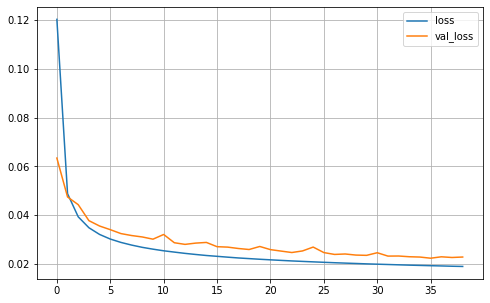

In [38]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

MODEL EVALUATION

In [39]:
y_pred = (model.predict((X_eval-m)/sd) * sd + m).clip(min=0)

In [40]:
mean_squared_error(y_pred, y_eval)

36172.85486352856

In [41]:
mean_squared_error(y_pred.T, y_eval.T, sample_weight=np.sum(y_pred, axis=0))

45546.800343311734

In [42]:
mean_squared_error(y_pred.ravel(), y_eval.ravel(), sample_weight=y_eval.ravel())

53190.328038514606

In [43]:
mean_absolute_error(y_pred, y_eval)

128.77028990555485

In [44]:
mean_absolute_error(y_pred.T, y_eval.T, sample_weight=np.sum(y_eval, axis=0))

145.81051613455506

In [45]:
mean_absolute_error(y_pred.ravel(), y_eval.ravel(), sample_weight=y_eval.ravel())

168.5936931706035

In [46]:
h=4
mean_absolute_error(y_pred[:,h], y_eval[:,h])

145.56665264964644

In [47]:
mean_absolute_error(y_pred[:,h], y_eval[:,h]) * len(y_eval[:,h]) / np.sum(y_eval[:,h])

0.06801221680854291

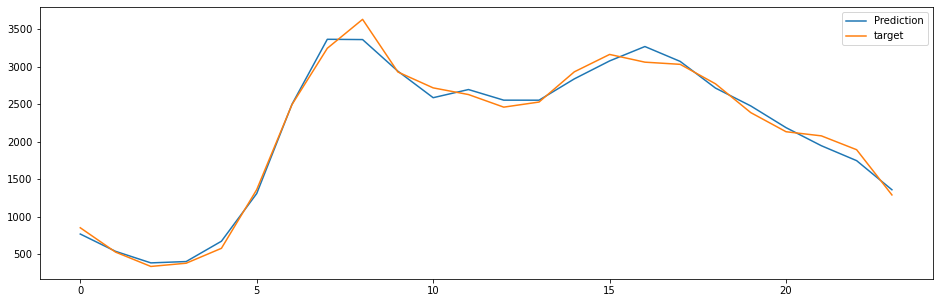

In [50]:
i=2
t=24
if i == 1:
    pd.DataFrame({'Prediction': y_pred[-t:,h], 'target': y_eval[-t:,h]}).plot(figsize=(16, 5))
else:
    pd.DataFrame({'Prediction': y_pred[-t*i:-t*(i-1),h], 'target': y_eval[-t*i:-t*(i-1),h]}).plot(figsize=(16, 5))
plt.show()

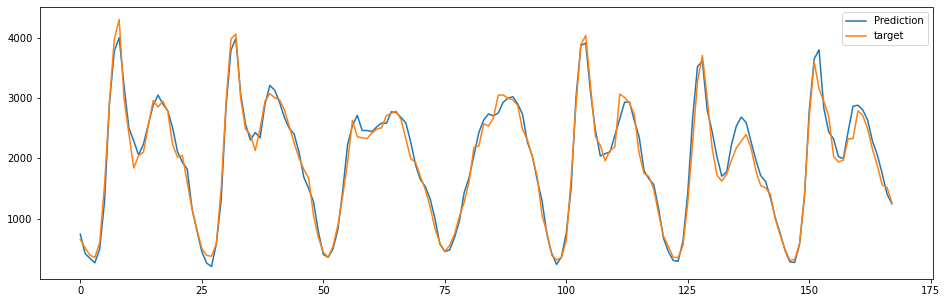

In [51]:
i=4
t=168
if i == 1:
    pd.DataFrame({'Prediction': y_pred[-t:,h], 'target': y_eval[-t:,h]}).plot(figsize=(16, 5))
else:
    pd.DataFrame({'Prediction': y_pred[-t*i:-t*(i-1),h], 'target': y_eval[-t*i:-t*(i-1),h]}).plot(figsize=(16, 5))
plt.show()


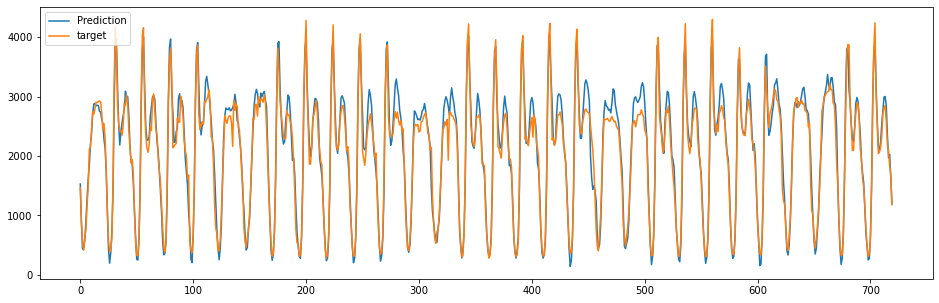

In [53]:
Dec=-744
Nov=-744-720
Oct=-744*2-720
Sep=-744*2-720*2
Aug=-744*3-720*2
Jul=-744*4-720*2

pd.DataFrame({'Prediction': y_pred[Sep:Oct,h], 'target': y_eval[Sep:Oct,h]}).plot(figsize=(16, 5))

plt.show()

## Deep learning model variants

In [54]:
[n for n in dir(keras.layers) if not n.startswith("_")]

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'Concatenate',
 'Conv1D',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM2D',
 'Convolution1D',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'CuDNNGRU',
 'CuDNNLSTM',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv2D',
 'Dot',
 'Dropout',
 'ELU',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPool3D',
 'GlobalMaxPool1D',
 'GlobalMaxPool2D',
 'GlobalMaxPool3D',
 'GlobalMaxPooling1D',
 'GlobalMaxPooling2D',
 'GlobalMaxPooling3D',
 'Inp

In [55]:
[n for n in dir(keras.losses) if not n.startswith("_")]

['BinaryCrossentropy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'Hinge',
 'Huber',
 'KLD',
 'KLDivergence',
 'LogCosh',
 'Loss',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'Poisson',
 'SparseCategoricalCrossentropy',
 'SquaredHinge',
 'binary_crossentropy',
 'categorical_crossentropy',
 'categorical_hinge',
 'cosine',
 'cosine_proximity',
 'cosine_similarity',
 'deserialize',
 'get',
 'hinge',
 'kld',
 'kullback_leibler_divergence',
 'logcosh',
 'mae',
 'mape',
 'mean_absolute_error',
 'mean_absolute_percentage_error',
 'mean_squared_error',
 'mean_squared_logarithmic_error',
 'mse',
 'msle',
 'poisson',
 'serialize',
 'sparse_categorical_crossentropy',
 'squared_hinge']

In [56]:
[n for n in dir(keras.optimizers) if not n.startswith("_")]

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'Ftrl',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 'deserialize',
 'get',
 'schedules',
 'serialize']

In [57]:
modelLSTM = keras.models.Sequential([
    keras.layers.LSTM(128, return_sequences=True, input_shape=[None, 19]),
    keras.layers.LSTM(128),
    keras.layers.Dense(19)
])

modelLSTM.compile(loss="mean_squared_error", optimizer="adam")

historyLSTM = modelLSTM.fit((X_train-m)/sd, (y_train-m)/sd, epochs=140,
                            validation_data=([(X_eval-m)/sd, (y_eval-m)/sd]),
                            callbacks=[early_stopping_cb])

Train on 13092 samples, validate on 4404 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/140
13092/13092 [==============================] - 13s 981us/sample - loss: 0.0729 - val_loss: 0.0309
Epoch 2/140
13092/13092 [==============================] - 12s 901us/sample - loss: 0.0227 - val_loss: 0.0259
Epoch 3/140
13092/13092 [==============================] - 13s 960us/sample - loss: 0.0197 - val_loss: 0.0219
Epoch 4/140
13092/13092 [==============================] - 11s 829us/sample - loss: 0.0178 - val_loss: 0.0191
Epoch 5/140
13092/13092 [==============================] - 11s 821us/sample - loss: 0.0165 - val_loss: 0.0184
Epoch 6/140
13092/13092 [==============================] - 11s 824us/sample - loss: 0.0157 - val_loss: 0.0183
Epoch 7/140
13092/13092 [==============================] - 11s 815us/sample - loss: 0.0151 - val_loss: 0.0184
Epoch 8/140
13092/13092 [==============================] - 11s 852us/sample - loss: 0.0

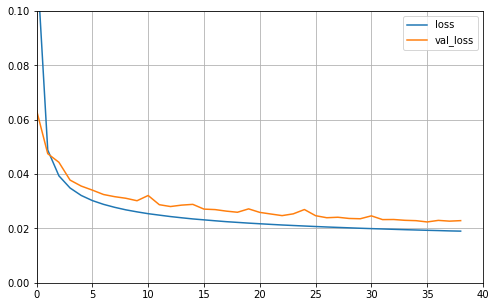

In [59]:
# Simple RNN
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.1)
plt.gca().set_xlim(0, 40)
plt.show()

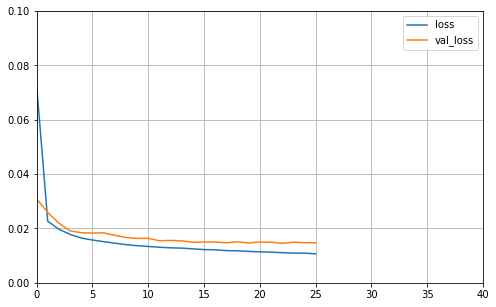

In [60]:
# LSTM
pd.DataFrame(historyLSTM.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.1)
plt.gca().set_xlim(0, 40)
plt.show()

## Save and load trained models

In [61]:
modelLSTM.save("C:/Users/b1053815/dati/datinuovi/Traffic_fig/LSTM_model.h5")

In [63]:
model_copy = keras.models.load_model("C:/Users/b1053815/dati/datinuovi/Traffic_fig/LSTM_model.h5")

In [64]:
model_copy.evaluate((X_eval-m)/sd, (y_eval-m)/sd)

4404/4404 [==============================] - 1s 221us/sample - loss: 0.0145


0.014535406263516395